**Build End-to-End ML pipeline for Warfarin Dosing Prediction**

In [ ]:
# Reading excel file
import pandas as pd
import numpy as np
data_frame = pd.read_excel('FinalData.xls')
data_frame.head()


,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Therapeutic Dose of Warfarin
0,male,White,60 - 69,193.040,115.7,NaN,0.0,0.0,2.5,2.60,*1/*1,A/G,49.0
1,female,White,50 - 59,176.530,144.2,NaN,0.0,0.0,2.5,2.15,*1/*1,A/A,42.0
2,female,White,40 - 49,162.560,77.1,NaN,0.0,0.0,2.5,1.90,*1/*1,G/G,53.0
3,male,White,60 - 69,182.245,90.7,NaN,0.0,0.0,2.5,2.40,*1/*1,A/G,28.0
4,male,White,50 - 59,167.640,72.6,NaN,0.0,0.0,2.5,1.90,*1/*3,A/G,42.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Checking columns of the dataset
data_frame.columns

Index(['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)',
       'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)',
       'Target INR', 'INR on Reported Therapeutic Dose of Warfarin',
       'Cyp2C9 genotypes',
       'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T',
       'Therapeutic Dose of Warfarin'],
      dtype='object')

In [ ]:
# Check missing values in the dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5696 non-null   object 
 1   Race (Reported)                                                    5194 non-null   object 
 2   Age                                                                5658 non-null   object 
 3   Height (cm)                                                        4554 non-null   float64
 4   Weight (kg)                                                        5413 non-null   float64
 5   Diabetes                                                           3283 non-null   float64
 6   Simvastatin (Zocor)                                                3861 non-null   float64
 7   Amiodarone (Cordarone)  

In [ ]:
# Describing the dataset
data_frame.describe()

,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Therapeutic Dose of Warfarin
count,4554.000000,5413.000000,3283.000000,3861.000000,4182.000000,1259.000000,4968.000000,5528.000000
mean,168.047778,77.852569,0.187024,0.146335,0.066236,2.538324,2.364438,30.977887
std,10.845992,21.859764,0.389990,0.353488,0.248724,0.198140,0.464644,16.801048
min,124.968000,30.000000,0.000000,0.000000,0.000000,1.300000,0.800000,2.100000
25%,160.020000,62.000000,0.000000,0.000000,0.000000,2.500000,2.100000,19.530000
50%,167.894000,75.000000,0.000000,0.000000,0.000000,2.500000,2.400000,28.000000
75%,176.022000,90.000000,0.000000,0.000000,0.000000,2.500000,2.610000,38.500000
max,202.000000,237.700000,1.000000,1.000000,1.000000,3.500000,6.100000,315.000000


In [ ]:
# Checking for NA Values in the dataset
data_frame.isna()

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Therapeutic Dose of Warfarin
0,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,False,False,False,False,False,False,False,False,True,False,False,True,False
5696,False,False,False,False,False,False,False,False,True,False,False,True,False
5697,False,False,False,False,False,False,False,False,True,False,False,True,False
5698,False,False,False,False,False,False,False,False,True,False,True,True,False


In [ ]:
# Finding Total Missing Values
data_frame.isna().sum()

Gender                                                                  4
Race (Reported)                                                       506
Age                                                                    42
Height (cm)                                                          1146
Weight (kg)                                                           287
Diabetes                                                             2417
Simvastatin (Zocor)                                                  1839
Amiodarone (Cordarone)                                               1518
Target INR                                                           4441
INR on Reported Therapeutic Dose of Warfarin                          732
Cyp2C9 genotypes                                                      133
VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T    1654
Therapeutic Dose of Warfarin                                          172
dtype: int64

In [ ]:
# Total sum of missing values
data_frame.isna().sum().sum()

14891

In [ ]:
# Replacing missing values with mode
mode_fillers = {
    'Gender': data_frame['Gender'].mode()[0],
    'Race (Reported)': data_frame['Race (Reported)'].mode()[0],
    'Age': data_frame['Age'].mode()[0],
    'Cyp2C9 genotypes': data_frame['Cyp2C9 genotypes'].mode()[0],
    'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T': data_frame['VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'].mode()[0]
}

data_frame.fillna(value=mode_fillers, inplace=True)


In [ ]:
# Replacing missing values with mean
mean_fillers = {
    'Height (cm)': data_frame['Height (cm)'].mean(),
    'Weight (kg)': data_frame['Weight (kg)'].mean(),
    'Diabetes': data_frame['Diabetes'].mean(),
    'Simvastatin (Zocor)': data_frame['Simvastatin (Zocor)'].mean(),
    'Amiodarone (Cordarone)': data_frame['Amiodarone (Cordarone)'].mean(),
    'Target INR': data_frame['Target INR'].mean(),
    'INR on Reported Therapeutic Dose of Warfarin': data_frame['INR on Reported Therapeutic Dose of Warfarin'].mean(),
    'Therapeutic Dose of Warfarin': data_frame['Therapeutic Dose of Warfarin'].mean()
}

data_frame.fillna(value=mean_fillers, inplace=True)

In [ ]:
# checking for missing values
data_frame.isna()

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Therapeutic Dose of Warfarin
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,False,False,False,False,False,False,False,False,False,False,False,False,False
5696,False,False,False,False,False,False,False,False,False,False,False,False,False
5697,False,False,False,False,False,False,False,False,False,False,False,False,False
5698,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_frame.isna().sum()

Gender                                                               0
Race (Reported)                                                      0
Age                                                                  0
Height (cm)                                                          0
Weight (kg)                                                          0
Diabetes                                                             0
Simvastatin (Zocor)                                                  0
Amiodarone (Cordarone)                                               0
Target INR                                                           0
INR on Reported Therapeutic Dose of Warfarin                         0
Cyp2C9 genotypes                                                     0
VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T    0
Therapeutic Dose of Warfarin                                         0
dtype: int64

array([[<Axes: title={'center': 'Height (cm)'}>,
        <Axes: title={'center': 'Weight (kg)'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Simvastatin (Zocor)'}>,
        <Axes: title={'center': 'Amiodarone (Cordarone)'}>,
        <Axes: title={'center': 'Target INR'}>],
       [<Axes: title={'center': 'INR on Reported Therapeutic Dose of Warfarin'}>,
        <Axes: title={'center': 'Therapeutic Dose of Warfarin'}>,
        <Axes: >]], dtype=object)

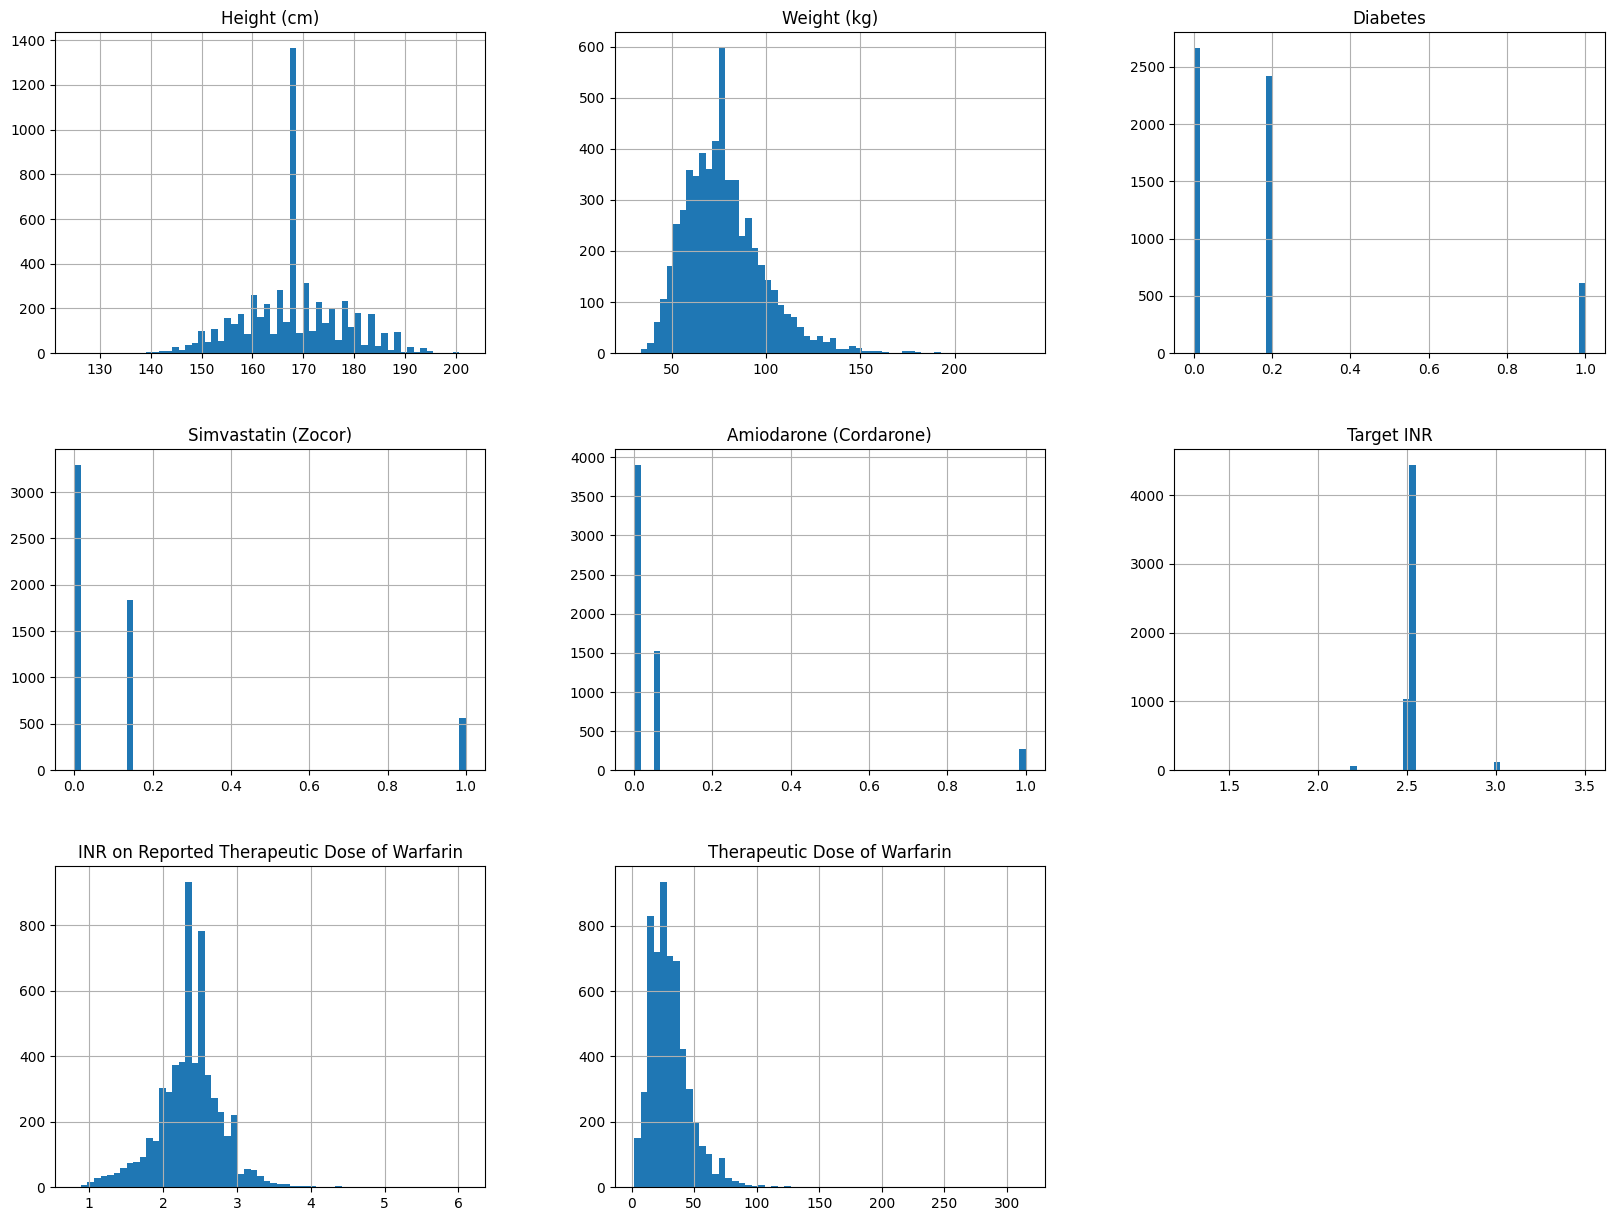

In [ ]:
# visualization of dataset
data_frame.hist(bins=60, figsize=(20,15))

Data visualization

In [ ]:
# Creating lables for model
df_target = data_frame[['Therapeutic Dose of Warfarin']]
df_features = data_frame.drop(columns=['Therapeutic Dose of Warfarin'])

In [ ]:
# Features without Target column
df_features.columns

Index(['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)',
       'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)',
       'Target INR', 'INR on Reported Therapeutic Dose of Warfarin',
       'Cyp2C9 genotypes',
       'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'],
      dtype='object')

In [ ]:
# Target column
df_target.columns

Index(['Therapeutic Dose of Warfarin'], dtype='object')

In [ ]:
# Spliting the data into train and test
from sklearn.model_selection import train_test_split
split_data = train_test_split(df_features, df_target, test_size=0.2, random_state=10)
X_train, X_test, y_train, y_test = split_data
X_train.head()

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
5437,female,White,70 - 79,160.020000,60.91,0.000000,0.000000,0.000000,2.538324,2.200000,*1/*3,A/A
2979,male,Korean,20 - 29,178.000000,82.00,0.000000,0.000000,0.000000,2.538324,2.470000,*1/*1,A/A
4743,female,Malay,60 - 69,168.047778,72.00,0.187024,0.146335,0.066236,2.538324,2.120000,*1/*1,A/A
2668,male,White,70 - 79,175.260000,85.30,0.000000,0.000000,0.000000,2.538324,2.500000,*1/*3,A/A
3264,male,Caucasian,80 - 89,168.047778,59.00,0.000000,0.146335,0.000000,2.538324,2.364438,*1/*2,G/G


In [ ]:
y_test.head()

,Therapeutic Dose of Warfarin
1477,17.50
5514,37.52
3243,13.72
5183,21.00
5107,14.00


In [ ]:
# Transformation of categorical values to binary of train set
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_train['Race (Reported)'] = le.fit_transform(X_train['Race (Reported)'])
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_train['Age'] = le.fit_transform(X_train['Age'])
X_train['Cyp2C9 genotypes'] = le.fit_transform(X_train['Cyp2C9 genotypes'])
X_train['VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'] = le.fit_transform(X_train['VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'])

In [ ]:
# MinMax normilization of train set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ## define the transformer
scaler.fit(X_train) ## call .fit() method to calculate the min and max value for each column in dataset
x_train_normalized = scaler.transform(X_train)
x_train_normalized=pd.DataFrame(x_train_normalized)
x_train_normalized

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.95,0.750,0.455032,0.148820,0.000000,0.000000,0.000000,0.450471,0.264151,0.5,0.0
1,1.0,0.65,0.125,0.688441,0.250361,0.000000,0.000000,0.000000,0.450471,0.315094,0.0,0.0
2,0.0,0.70,0.625,0.559245,0.202215,0.187024,0.146335,0.066236,0.450471,0.249057,0.0,0.0
3,1.0,0.95,0.750,0.652872,0.266249,0.000000,0.000000,0.000000,0.450471,0.320755,0.5,0.0
4,1.0,0.30,0.875,0.559245,0.139624,0.000000,0.146335,0.000000,0.450471,0.295177,0.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4555,1.0,0.60,0.375,0.596817,0.235917,0.187024,0.146335,0.066236,0.450471,0.295177,0.0,0.0
4556,0.0,0.10,0.625,0.586925,0.474723,1.000000,1.000000,0.000000,0.428571,0.358491,0.0,1.0
4557,0.0,0.60,0.625,0.375896,0.144439,0.187024,0.146335,0.066236,0.450471,0.107547,0.0,0.0
4558,0.0,0.95,0.375,0.455032,0.144439,0.000000,0.000000,0.000000,0.450471,0.377358,0.5,1.0


In [ ]:
# Transformation of categorical values to binary of test set
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_test['Race (Reported)'] = le.fit_transform(X_test['Race (Reported)'])
X_test['Gender'] = le.fit_transform(X_test['Gender'])
X_test['Age'] = le.fit_transform(X_test['Age'])
X_test['Cyp2C9 genotypes'] = le.fit_transform(X_test['Cyp2C9 genotypes'])
X_test['VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'] = le.fit_transform(X_test['VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'])

In [ ]:
# MinMax normilization of train setfrom sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() ## define the transformer
scaler.fit(X_test) ## call .fit() method to calculate the min and max value for each column in dataset
x_test_normalized = scaler.transform(X_test)
x_test_normalized=pd.DataFrame(x_test_normalized)
x_test_normalized

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.4375,0.142857,0.332917,0.241880,0.000000,0.000000,0.000000,0.562875,0.590164,0.428571,0.0
1,1.0,0.2500,0.714286,0.833333,0.339254,0.000000,0.000000,0.000000,0.562875,0.419672,0.000000,0.0
2,0.0,0.3125,0.571429,0.465023,0.297167,0.000000,0.146335,1.000000,0.562875,0.473586,1.000000,0.0
3,1.0,1.0000,0.285714,0.546250,0.290256,0.000000,0.000000,1.000000,0.562875,0.419672,0.285714,0.5
4,0.0,1.0000,0.857143,0.300000,0.345543,0.000000,0.000000,0.000000,0.562875,0.354098,0.285714,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1.0,0.6875,0.285714,0.366667,0.172771,0.187024,0.146335,0.066236,0.562875,0.127869,0.000000,0.0
1136,1.0,0.3125,0.142857,0.465023,0.200415,0.000000,0.146335,0.000000,0.562875,0.473586,0.000000,0.0
1137,1.0,1.0000,0.285714,0.637500,0.373186,0.000000,1.000000,0.000000,0.545455,0.508197,0.000000,0.0
1138,1.0,0.6875,0.571429,0.445833,0.124395,0.187024,0.146335,0.066236,0.562875,0.331148,0.428571,0.0


In [ ]:
# Binary classification dataset by cutting the target values into two categories (<=30, >30)
y_train[y_train<=30] = 0
y_train[y_train>30] = 1

In [ ]:
y_train

,Therapeutic Dose of Warfarin
5437,0.0
2979,1.0
4743,0.0
2668,0.0
3264,1.0
...,...
1180,0.0
3441,1.0
1344,0.0
4623,0.0


In [ ]:
# Display unique values of the 'Therapeutic Dose of Warfarin' column in train set
print(y_train["Therapeutic Dose of Warfarin"].unique())

[0. 1.]


In [ ]:
y_test[y_test<=30] = 0
y_test[y_test>30] = 1

In [ ]:
y_test

,Therapeutic Dose of Warfarin
1477,0.0
5514,1.0
3243,0.0
5183,0.0
5107,0.0
...,...
924,0.0
3317,0.0
1846,0.0
1316,0.0


In [ ]:
# Display unique values of the 'Therapeutic Dose of Warfarin' column in test set
print(y_test["Therapeutic Dose of Warfarin"].unique())

[0. 1.]


**Model training**

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree model
decision_tree_model = DecisionTreeClassifier(max_depth=3)

# Fit the model on the normalized training data
decision_tree_model.fit(x_train_normalized, y_train)

# Predict using the trained model on the normalized test data
decision_tree_model.predict(x_test_normalized)


array([1., 1., 0., ..., 1., 0., 1.])

In [ ]:
# calculating score
decision_tree_model.score(x_train_normalized,y_train)

0.7032894736842106

In [ ]:
# Decision tree performance oon test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Predict using the decision tree model on the normalized test data
decision_tree_model_pred = decision_tree_model.predict(x_test_normalized)

# Calculate accuracy
decision_tree_model_acc = accuracy_score(y_test, decision_tree_model_pred)

# Calculate precision
decision_tree_model_prec = precision_score(y_test, decision_tree_model_pred)

# Calculate recall
decision_tree_model_recall = recall_score(y_test, decision_tree_model_pred)

# Calculate ROC AUC score
decision_tree_model_roc = roc_auc_score(y_test, decision_tree_model_pred)

# Calculate F1 score
decision_tree_model_f1 = f1_score(y_test, decision_tree_model_pred)

# Print performance metrics
print(decision_tree_model_acc)
print(decision_tree_model_prec)
print(decision_tree_model_recall)
print(decision_tree_model_roc)
print(decision_tree_model_f1)


0.637719298245614
0.5602165087956699
0.8247011952191236
0.657648403252195
0.6672038678485093


In [ ]:
!pip install --upgrade scikit-learn

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


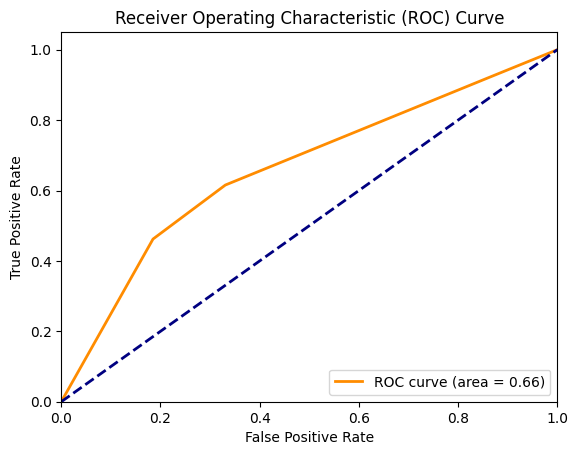

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming decision_tree_model is your classifier and X_test, y_test are your test data
y_score = decision_tree_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


[Text(0.5, 0.875, 'x[11] <= 0.75\ngini = 0.496\nsamples = 4560\nvalue = [2486, 2074]'),
 Text(0.25, 0.625, 'x[4] <= 0.241\ngini = 0.472\nsamples = 3638\nvalue = [2249, 1389]'),
 Text(0.125, 0.375, 'x[7] <= 0.033\ngini = 0.406\nsamples = 2368\nvalue = [1697.0, 671.0]'),
 Text(0.0625, 0.125, 'gini = 0.465\nsamples = 1309\nvalue = [827.0, 482.0]'),
 Text(0.1875, 0.125, 'gini = 0.293\nsamples = 1059\nvalue = [870.0, 189.0]'),
 Text(0.375, 0.375, 'x[10] <= 0.45\ngini = 0.491\nsamples = 1270\nvalue = [552.0, 718.0]'),
 Text(0.3125, 0.125, 'gini = 0.476\nsamples = 1095\nvalue = [428, 667]'),
 Text(0.4375, 0.125, 'gini = 0.413\nsamples = 175\nvalue = [124.0, 51.0]'),
 Text(0.75, 0.625, 'x[10] <= 0.45\ngini = 0.382\nsamples = 922\nvalue = [237, 685]'),
 Text(0.625, 0.375, 'x[4] <= 0.205\ngini = 0.333\nsamples = 806\nvalue = [170, 636]'),
 Text(0.5625, 0.125, 'gini = 0.457\nsamples = 249\nvalue = [88, 161]'),
 Text(0.6875, 0.125, 'gini = 0.251\nsamples = 557\nvalue = [82.0, 475.0]'),
 Text(0.875

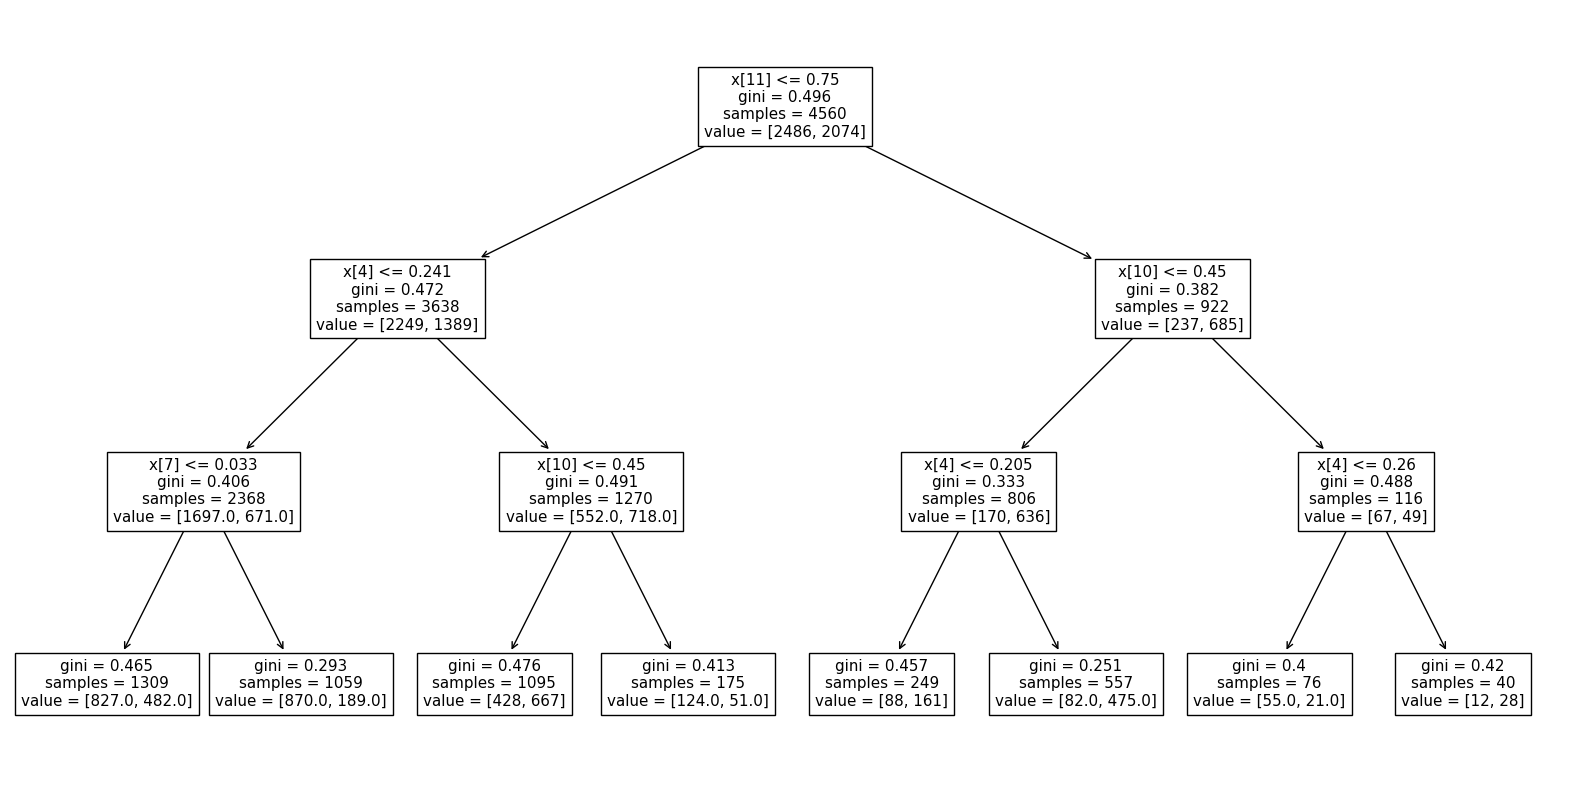

In [ ]:
# visualization of decision tree
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree_model)


In [ ]:
import joblib
model_file_path = "/content/drive/My Drive/decision_tree_model.pkl"
#joblib.dump(decision_tree_model, model_file_path)


In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_model = LogisticRegression(penalty='l2', C=1, random_state=0)

# Fit the model to the normalized training data
logistic_model.fit(x_train_normalized, y_train)

# Make predictions on the normalized test data
logistic_predictions = logistic_model.predict(x_test_normalized)

# Print the predictions
print(logistic_predictions)


[0. 1. 0. ... 1. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
logistic_model.score(x_train_normalized,y_train)

0.7247807017543859

In [ ]:
# Logistic regression - performance on the test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Predicting the target values for the test data using the logistic regression model
logistic_pred = logistic_model.predict(x_test_normalized)

# Calculating the accuracy score
logistic_acc = accuracy_score(y_test, logistic_pred)

# Calculating the precision score
logistic_prec = precision_score(y_test, logistic_pred)

# Calculating the recall score
logistic_recall = recall_score(y_test, logistic_pred)

# Calculating the ROC AUC score
logistic_roc = roc_auc_score(y_test, logistic_pred)

# Calculating the F1 score
logistic_f1 = f1_score(y_test, logistic_pred)

# Printing the calculated performance metrics
print(logistic_acc)
print(logistic_prec)
print(logistic_recall)
print(logistic_roc)
print(logistic_f1)


0.7035087719298245
0.6238670694864048
0.8227091633466136
0.7162135158425857
0.7096219931271478


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


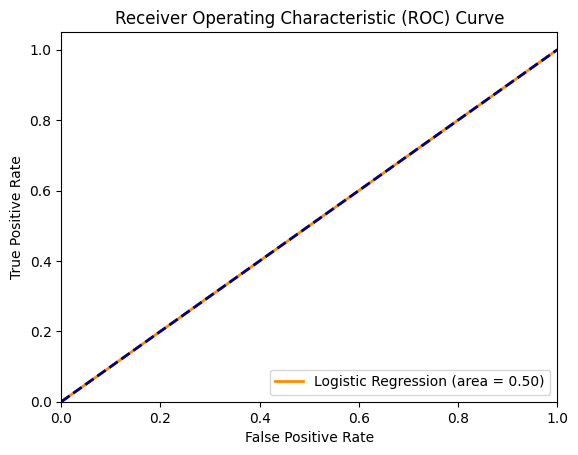

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming logistic_model is your classifier and X_test, y_test are your test data
y_score = logistic_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import joblib
model_file_path = "/content/drive/My Drive/logistic_model.pkl"
joblib.dump(logistic_model, model_file_path)

['/content/drive/My Drive/logistic_model.pkl']

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

# Define SVM model with C=1
svm_model = SVC(C=1)

# Fit SVM model to the normalized training data
svm_model.fit(x_train_normalized, y_train)

# Predict target values for the normalized test data
svm_model.predict(x_test_normalized)

# Compute and print the accuracy score of the SVM model on the training data
svm_model.score(x_train_normalized, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7449561403508772

In [ ]:
import joblib
model_file_path = "/content/drive/My Drive/svm_model.pkl"
joblib.dump(svm_model, model_file_path)

['/content/drive/My Drive/svm_model.pkl']

In [ ]:
# linear kernel
svm_model_linear = SVC(kernel="linear", degree=3, C=5)

# Fit SVM model with linear kernel to the normalized training data
svm_model_linear.fit(x_train_normalized, y_train)

# Predict target values for the normalized test data
svm_model_linear.predict(x_test_normalized)

# Compute and print the accuracy score of the SVM model with linear kernel on the training data
svm_model_linear.score(x_train_normalized, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7243421052631579

In [ ]:
import joblib
model_file_path = "/content/drive/My Drive/svm_model_linear.pkl"
joblib.dump(svm_model_linear, model_file_path)

['/content/drive/My Drive/svm_model_linear.pkl']

In [ ]:
# RBF kernel SVM model
svm_model_rbf = SVC(kernel="rbf", C=5)

# Train the SVM model with RBF kernel using the normalized training data
svm_model_rbf.fit(x_train_normalized, y_train)

# Predict target values for the normalized test data
svm_model_rbf.predict(x_test_normalized)

# Compute and print the accuracy score of the SVM model with RBF kernel on the training data
svm_model_rbf.score(x_train_normalized, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.756578947368421

In [ ]:
import joblib
model_file_path = "/content/drive/My Drive/svm_model_rbf.pkl"
joblib.dump(svm_model_rbf, model_file_path)

['/content/drive/My Drive/svm_model_rbf.pkl']

In [ ]:
# Sigmoid kernel SVM model with degree included
svm_model_sigmoid = SVC(kernel="sigmoid", degree=3, C=5)

# Train the SVM model with Sigmoid kernel using the normalized training data
svm_model_sigmoid.fit(x_train_normalized, y_train)

# Predict target values for the normalized test data
svm_model_sigmoid.predict(x_test_normalized)

# Compute and print the accuracy score of the SVM model with Sigmoid kernel on the training data
svm_model_sigmoid.score(x_train_normalized, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.493859649122807

In [ ]:
import joblib
model_file_path = "/content/drive/My Drive/svm_model_sigmoid.pkl"
joblib.dump(svm_model_sigmoid, model_file_path)

['/content/drive/My Drive/svm_model_sigmoid.pkl']

In [ ]:
# Polynomial kernel SVM model
svm_model_polynomial = SVC(kernel="poly", degree=3, C=5)

# Train the SVM model with Polynomial kernel using the normalized training data
svm_model_polynomial.fit(x_train_normalized, y_train)

# Predict target values for the normalized test data
svm_model_polynomial.predict(x_test_normalized)

# Compute and print the accuracy score of the SVM model with Polynomial kernel on the training data
svm_model_polynomial.score(x_train_normalized, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7526315789473684

In [ ]:
import joblib
model_file_path = "/content/drive/My Drive/svm_model_polynomial.pkl"
joblib.dump(svm_model_polynomial, model_file_path)

['/content/drive/My Drive/svm_model_polynomial.pkl']

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# SVM Model Evaluation
svm_model_pred = svm_model_polynomial.predict(x_test_normalized)
svm_acc = accuracy_score(y_test, svm_model_pred)
svm_prec = precision_score(y_test, svm_model_pred)
svm_recall = recall_score(y_test, svm_model_pred)
svm_roc = roc_auc_score(y_test, svm_model_pred)
svm_f1 = f1_score(y_test, svm_model_pred)
print(svm_acc)
print(svm_prec)
print(svm_recall)
print(svm_roc)
print(svm_f1)



0.718421052631579
0.661319073083779
0.7390438247011952
0.7206190910339833
0.6980244590780809


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


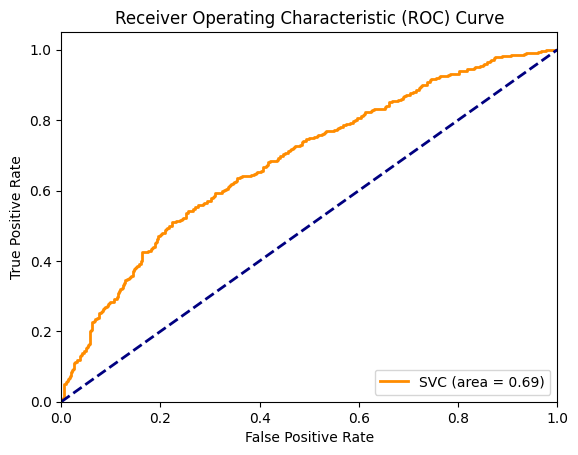

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming svm_model_polynomial is your classifier and X_test, y_test are your test data
y_score = svm_model_polynomial.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='SVC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Importing the K Nearest-neighbors classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Initializing the K Nearest-neighbors model with 5 neighbors and the Minkowski distance metric
knn_model = KNeighborsClassifier(n_neighbors=5, metric="minkowski")

# Fitting the K Nearest-neighbors model on the normalized training data
knn_model.fit(x_train_normalized, y_train)

# Predicting the target values for the normalized test data using the trained K Nearest-neighbors model
knn_model.predict(x_test_normalized)

# Calculating the accuracy score of the K Nearest-neighbors model on the normalized training data
knn_model.score(x_train_normalized, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7916666666666666

In [ ]:
import joblib
model_file_path = "/content/drive/My Drive/knn_model.pkl"
joblib.dump(knn_model, model_file_path)

['/content/drive/My Drive/knn_model.pkl']

In [ ]:
# KNN - performance on the test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# KNN Model Evaluation
knn_model_pred = knn_model.predict(x_test_normalized)
knn_acc = accuracy_score(y_test, knn_model_pred)
knn_prec = precision_score(y_test, knn_model_pred)
knn_recall = recall_score(y_test, knn_model_pred)
knn_roc = roc_auc_score(y_test, knn_model_pred)
knn_f1 = f1_score(y_test, knn_model_pred)

print(knn_acc)
print(knn_prec)
print(knn_recall)
print(knn_roc)
print(knn_f1)


0.7149122807017544
0.6654205607476635
0.7091633466135459
0.714299541645331
0.686595949855352


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


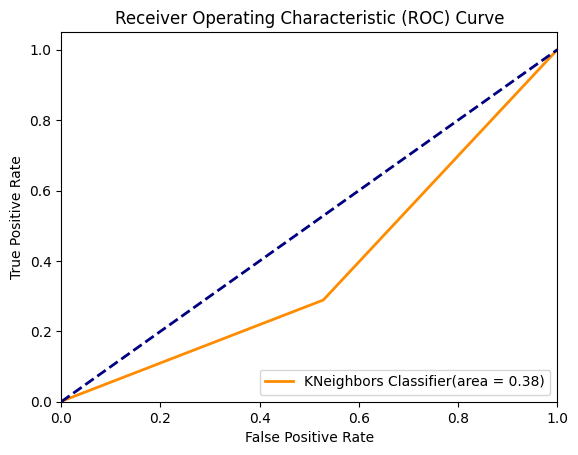

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming knn_model is your classifier and X_test, y_test are your test data
y_score = knn_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='KNeighbors Classifier(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Importing the RandomForestClassifier from sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# Creating a RandomForestClassifier model with specified parameters
random_forest_model = RandomForestClassifier(n_estimators=100, max_leaf_nodes=18)

# Training the RandomForestClassifier model on the normalized training data
random_forest_model.fit(x_train_normalized, y_train)

# Predicting the target labels for the normalized test data using the trained model
random_forest_model.predict(x_test_normalized)

# Calculating the accuracy score of the RandomForestClassifier model on the normalized training data
random_forest_model.score(x_train_normalized, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7421052631578947

In [ ]:
import joblib
model_file_path = "/content/drive/My Drive/random_forest_model.pkl"
joblib.dump(random_forest_model, model_file_path)

['/content/drive/My Drive/random_forest_model.pkl']

In [ ]:
# Random Forest - performance on the test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
random_forest_pred = random_forest_model.predict(x_test_normalized)
random_forest_acc = accuracy_score(y_test, random_forest_pred )
random_forest_prec = precision_score(y_test, random_forest_pred )
random_forest_recall = recall_score(y_test, random_forest_pred )
random_forest_roc = roc_auc_score(y_test, random_forest_pred )
random_forest_f1 = f1_score(y_test, random_forest_pred )
print(random_forest_acc)
print(random_forest_prec)
print(random_forest_recall)
print(random_forest_roc)
print(random_forest_f1)

0.7140350877192982
0.6461794019933554
0.7749003984063745
0.7205222995166669
0.7047101449275363


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


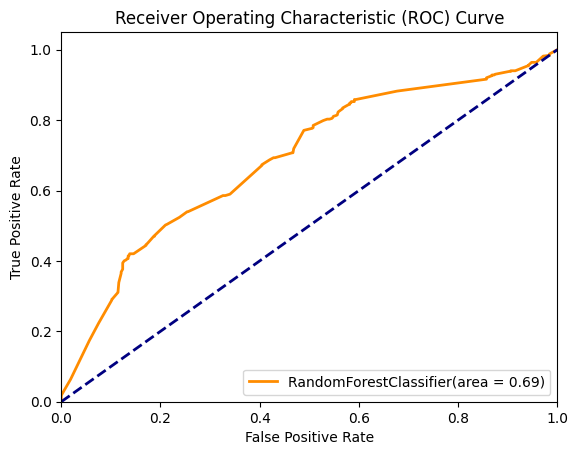

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming random_forest_model is your classifier and X_test, y_test are your test data
y_score = random_forest_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='RandomForestClassifier(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Softmax Regression classifier
from sklearn.linear_model import LogisticRegression

softmax_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_regression.fit(x_train_normalized, y_train)

# Get the predicted labels for training instances
y_prediction_labels = softmax_regression.predict(x_train_normalized)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_prediction_labels

array([0., 1., 0., ..., 0., 1., 0.])

In [ ]:
# Get the predicted probabilities of both classes for training instances
y_prediction_probs = softmax_regression.predict_proba(x_train_normalized)
y_prediction_probs

array([[0.91584586, 0.08415414],
       [0.25960261, 0.74039739],
       [0.63893618, 0.36106382],
       ...,
       [0.84732268, 0.15267732],
       [0.40201416, 0.59798584],
       [0.71385464, 0.28614536]])

In [ ]:
# Accuracy
import sklearn
sklearn.metrics.accuracy_score(y_train,y_prediction_labels)

0.7267543859649123

In [ ]:
# Build multi-layer neural network for binary classification
# Practice 2.1: Load training data
import pandas as pd
from sklearn.utils import shuffle

train_data = X_train
train_data.columns = ['Label'] + [f'F{i}' for i in range(1, 12)]
train_data = shuffle(train_data)  # Shuffle data
train_data


,Label,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11
106,1,19,7,172.720000,72.6,0.187024,0.000000,0.000000,2.500000,1.800000,5,2
3544,1,6,7,179.000000,80.0,0.000000,0.000000,0.000000,2.538324,3.020000,0,1
2029,1,19,5,166.878000,79.3,0.187024,0.146335,0.066236,2.538324,2.364438,5,2
142,0,19,7,157.480000,49.9,0.187024,0.000000,0.000000,2.500000,2.400000,0,1
260,1,19,6,187.960000,83.5,0.187024,0.000000,0.000000,2.500000,2.000000,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4380,0,6,6,168.047778,97.0,0.187024,0.146335,0.066236,2.538324,1.950000,0,0
5222,1,19,6,180.009800,71.0,0.000000,0.000000,0.000000,2.538324,2.364438,4,1
1738,1,19,6,173.736000,84.1,1.000000,1.000000,0.000000,2.500000,2.800000,0,0
359,0,18,4,170.180000,67.1,0.187024,0.000000,0.000000,3.000000,2.200000,0,1


In [ ]:
import pandas as pd

test_data = x_test_normalized
test_data.columns = ['Label'] + [f'F{i}' for i in range(1, 12)]
test_data


,Label,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11
0,0.0,0.4375,0.142857,0.332917,0.241880,0.000000,0.000000,0.000000,0.562875,0.590164,0.428571,0.0
1,1.0,0.2500,0.714286,0.833333,0.339254,0.000000,0.000000,0.000000,0.562875,0.419672,0.000000,0.0
2,0.0,0.3125,0.571429,0.465023,0.297167,0.000000,0.146335,1.000000,0.562875,0.473586,1.000000,0.0
3,1.0,1.0000,0.285714,0.546250,0.290256,0.000000,0.000000,1.000000,0.562875,0.419672,0.285714,0.5
4,0.0,1.0000,0.857143,0.300000,0.345543,0.000000,0.000000,0.000000,0.562875,0.354098,0.285714,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1.0,0.6875,0.285714,0.366667,0.172771,0.187024,0.146335,0.066236,0.562875,0.127869,0.000000,0.0
1136,1.0,0.3125,0.142857,0.465023,0.200415,0.000000,0.146335,0.000000,0.562875,0.473586,0.000000,0.0
1137,1.0,1.0000,0.285714,0.637500,0.373186,0.000000,1.000000,0.000000,0.545455,0.508197,0.000000,0.0
1138,1.0,0.6875,0.571429,0.445833,0.124395,0.187024,0.146335,0.066236,0.562875,0.331148,0.428571,0.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_shape=(22,), activation='relu'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               2300      
                                                                 
Total params: 2300 (8.98 KB)
Trainable params: 2300 (8.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(100, input_shape=(22,), activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               2300      
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 12501 (48.83 KB)
Trainable params: 12501 (48.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model for backpropagation, and start training model on data
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(100, input_shape=(12,), activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Compile model, use binary crossentropy, and stochastic gradient descent for optimization
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               1300      
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11501 (44.93 KB)
Trainable params: 11501 (44.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
143/143 [==============================] - 5s 7ms/step - loss: 1.1637 - accuracy: 0.6103
Epoch 2/50
143/143 [==============================] - 1s 6ms/step - loss: 0.6468 - accuracy: 0.6285
Epoch 3/50
143/143 [==============================] - 1s 10ms/step - loss: 0.6447 - accuracy: 0.6353
Epoch 4/50
143/143 [==============================] - 1s 7ms/step - loss: 0.6422 - accuracy: 0.6327
Epoch 5/50
143/143 [==============================] - 1s 9ms/step - loss: 0.6389 - accuracy: 0.6414
Epoch 6/50
143/143 [==============================] - 1s 7ms/step - loss: 0.6368 - accuracy: 0.6404
Epoch 7/50
143/143 [==============================] - 1s 5ms/step - loss: 0.6357 - accuracy: 0.6496
Epoch 8/50
143/143 [==============================] - 1s 4ms/step - loss: 0.6337 - accuracy: 0.6447
Epoch 9/50
143/143 [==============================] - 2s 11ms/step - loss: 0.6350 - accuracy: 0.6410
Epoch 10/50
143/143 [==============================] - 1s 10ms/step - loss: 0.6352 - accuracy: 0.6

In [ ]:
from tensorflow.keras.models import load_model
model.save("/content/drive/My Drive/tensor_keras.pkl")
#model_loaded = load_model("my_model.h5")

In [ ]:
model.evaluate(X_train, y_train)

143/143 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.6781


[0.5956673622131348, 0.6780701875686646]

In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
print("train_predictions: ", X_train) # Print train_predictions

36/36 [==============================] - 0s 2ms/step
train_predictions:        Label  F1  F2          F3      F4        F5        F6        F7  \
5437      0  19   6  160.020000   60.91  0.000000  0.000000  0.000000   
2979      1  13   1  178.000000   82.00  0.000000  0.000000  0.000000   
4743      0  14   5  168.047778   72.00  0.187024  0.146335  0.066236   
2668      1  19   6  175.260000   85.30  0.000000  0.000000  0.000000   
3264      1   6   7  168.047778   59.00  0.000000  0.146335  0.000000   
...     ...  ..  ..         ...     ...       ...       ...       ...   
1180      1  12   3  170.942000   79.00  0.187024  0.146335  0.066236   
3441      0   2   5  170.180000  128.60  1.000000  1.000000  0.000000   
1344      0  12   5  153.924000   60.00  0.187024  0.146335  0.066236   
4623      0  19   3  160.020000   60.00  0.000000  0.000000  0.000000   
1289      0  12   5  157.988000   60.00  0.187024  0.146335  0.066236   

            F8        F9  F10  F11  
5437  2.53832

In [ ]:
import numpy as np

# Convert predicted probabilities to binary labels using a threshold of 0.5
train_prediction_labels = (train_predictions > 0.5).astype(int)
test_prediction_labels = (test_predictions > 0.5).astype(int)


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate and print the training accuracy
print("Training accuracy: ", accuracy_score(y_train, train_prediction_labels))

# Calculate and print the test accuracy
print("Test accuracy: ", accuracy_score(y_test, test_prediction_labels))


Training accuracy:  0.6780701754385965
Test accuracy:  0.6912280701754386


In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with desired number of components
pca = PCA(n_components=2)

# Fit PCA to training data and transform it in one step
X_reduced = pca.fit_transform(X_train)


In [ ]:
# Inital Shape
X_train.shape
print("Initiial shape:",X_train.shape)
# Reduced Shape
X_reduced.shape
print("Reduce shape:",X_reduced.shape)

Initiial shape: (4560, 12)
Reduce shape: (4560, 2)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiate and train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_reduced, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [ ]:
import joblib
model_file_path = "/content/drive/My Drive/LinearDiscriminantAnalysis_model.pkl"
joblib.dump(knn_model, model_file_path)

['/content/drive/My Drive/LinearDiscriminantAnalysis_model.pkl']

In [ ]:
# Score
lda.score(X_reduced, y_train)

0.6515350877192982

In [ ]:
# Evalution Metrics
TabularData = {'Methods': ['Decision Tree', 'SVM', 'KNN', 'Random Forest', 'Logistic regression'],
              'Accuracy': [decision_tree_model_acc, svm_acc, knn_acc, random_forest_acc, logistic_acc],
              'Precision': [decision_tree_model_prec, svm_prec, knn_prec, random_forest_prec, logistic_prec],
              'Recall': [decision_tree_model_recall, svm_recall, knn_recall, random_forest_recall, logistic_recall],
              'F1-score': [decision_tree_model_f1, svm_f1, knn_f1, random_forest_f1, logistic_f1],
              'AUC score': [decision_tree_model_roc, svm_roc, knn_roc, random_forest_roc, logistic_roc]}

evaluation_metrics = pd.DataFrame(TabularData)

In [ ]:
evaluation_metrics

,Methods,Accuracy,Precision,Recall,F1-score,AUC score
0,Decision Tree,0.637719,0.560217,0.824701,0.667204,0.657648
1,SVM,0.718421,0.661319,0.739044,0.698024,0.720619
2,KNN,0.714912,0.665421,0.709163,0.686596,0.714300
3,Random Forest,0.714035,0.646179,0.774900,0.704710,0.720522
4,Logistic regression,0.703509,0.623867,0.822709,0.709622,0.716214


In [ ]:
# Cross Validation for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
CV_scores_decision_tree_model = cross_val_score(estimator = decision_tree_model, X = x_train_normalized, y = y_train, cv = 30, scoring = 'accuracy')
print("CV_scores: ", CV_scores_decision_tree_model)

CV_scores:  [0.67763158 0.67763158 0.67105263 0.65131579 0.68421053 0.75657895
 0.72368421 0.63157895 0.65131579 0.80921053 0.73684211 0.69736842
 0.67763158 0.71710526 0.72368421 0.65789474 0.68421053 0.625
 0.79605263 0.68421053 0.73026316 0.69078947 0.66447368 0.73026316
 0.65789474 0.72368421 0.69736842 0.63815789 0.71710526 0.69736842]


In [ ]:
# Predicting on test data using the decision tree model
y_test_pred_dt = decision_tree_model.predict(x_test_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculating accuracy
decision_tree_acc_cv = accuracy_score(y_test_pred_dt, y_test)

# Calculating precision
decision_tree_prec_cv = precision_score(y_test_pred_dt, y_test)

# Calculating recall
decision_tree_recall_cv = recall_score(y_test_pred_dt, y_test)

# Calculating F1 score
decision_tree_f1_cv = f1_score(y_test_pred_dt, y_test)

# Calculating ROC AUC score (assuming you have imported roc_auc_score)
from sklearn.metrics import roc_auc_score
decision_tree_roc_cv = roc_auc_score(y_test_pred_dt, y_test)

# Printing the calculated metrics
print("Accuracy: ", decision_tree_acc_cv)
print("Precision:", decision_tree_prec_cv)
print("Recall:", decision_tree_recall_cv)
print("F1 Score:", decision_tree_f1_cv)
print("ROC AUC Score:", decision_tree_roc_cv)


Accuracy:  0.637719298245614
Precision: 0.8247011952191236
Recall: 0.5602165087956699
F1 Score: 0.6672038678485093
ROC AUC Score: 0.6703825686122988


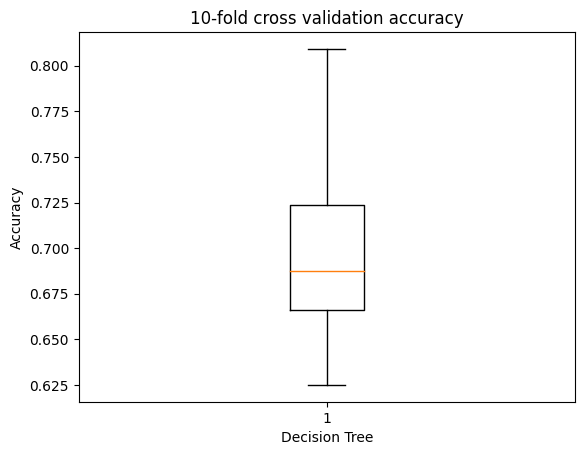

In [ ]:
# Plotting the boxplot of cross-validation scores
plt.boxplot(CV_scores_decision_tree_model)

# Adding title to the plot
plt.title("10-fold cross validation accuracy")

# Adding label to x-axis
plt.xlabel("Decision Tree")

# Adding label to y-axis
plt.ylabel("Accuracy")

# Displaying the plot
plt.show()

In [ ]:
# Cross validation for Logictic regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Creating an instance of Logistic Regression model
logistic_model = LogisticRegression()

# Performing cross-validation
CV_scores_lr = cross_val_score(logistic_model, X_train, y_train, cv=10, scoring='accuracy')

# Printing the cross-validation scores
print("CV_scores:", CV_scores_lr)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

CV_scores: [0.72587719 0.73464912 0.69078947 0.73903509 0.73464912 0.73026316
 0.74561404 0.72368421 0.70175439 0.70614035]


In [ ]:
# Accuracy, Precision, Recall and F1-score
# Predicting on test data using the random forest model
y_test_pred3 = random_forest_model.predict(x_test_normalized)

# Calculating and printing accuracy
print("Accuracy: ", accuracy_score(y_test_pred3, y_test))

# Calculating and printing precision
print("Precision:", precision_score(y_test_pred3.astype(int), y_test.astype(int)))

# Calculating and printing recall
print("Recall:", recall_score(y_test_pred3.astype(int), y_test.astype(int)))

# Calculating and printing F1-score
print("F1 Score:", f1_score(y_test_pred3.astype(int), y_test.astype(int)))

Accuracy:  0.7140350877192982
Precision: 0.7749003984063745
Recall: 0.6461794019933554
F1 Score: 0.7047101449275363


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Predicting on the test data using the random forest model
y_test_pred_lr = random_forest_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
# Calculating accuracy
logistic_model_acc_cv = metrics.accuracy_score(y_test_pred_lr,y_test)
# Calculating precision
logistic_model_prec_cv = precision_score(y_test_pred_lr, y_test)

# Calculating recall
logistic_model_recall_cv = recall_score(y_test_pred_lr, y_test)

# Calculating F1 score
logistic_model_f1_cv = f1_score(y_test_pred_lr, y_test)

# Calculating ROC AUC score
logistic_model_roc_cv = roc_auc_score(y_test_pred_lr, y_test)

# Printing the calculated metrics
print("Accuracy: ", logistic_model_acc_cv)
print("Precision:", logistic_model_prec_cv)
print("Recall:", logistic_model_recall_cv)
print("F1 Score:", logistic_model_f1_cv)
print("ROC AUC Score:", logistic_model_roc_cv)

Accuracy:  0.4850877192982456
Precision: 0.9203187250996016
Recall: 0.4578790882061447
F1 Score: 0.6115155526141628
ROC AUC Score: 0.5762677883778815


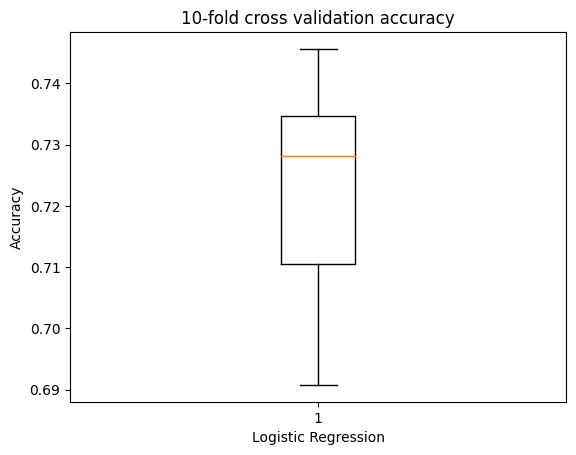

In [ ]:
# Plotting the boxplot of cross-validation scores for logistic regression
plt.boxplot(CV_scores_lr)

# Adding title to the plot
plt.title("10-fold cross validation accuracy")

# Adding label to x-axis
plt.xlabel("Logistic Regression")

# Adding label to y-axis
plt.ylabel("Accuracy")

# Displaying the plot
plt.show()

In [ ]:
# Cross validation for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model1 = random_forest_model
CV_scores_random_forest_model = cross_val_score(estimator = model1, X = X_train, y = y_train, cv = 5, scoring = 'accuracy')
print("CV_scores: ", CV_scores_random_forest_model)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

CV_scores:  [0.71820175 0.72807018 0.72697368 0.73135965 0.7247807 ]


In [ ]:
# Predicting on the test data using the random forest model
y_test_pred_rf = random_forest_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculating accuracy
random_forest_acc_cv = accuracy_score(y_test_pred_rf, y_test)

# Calculating precision
random_forest_prec_cv = precision_score(y_test_pred_rf, y_test)

# Calculating recall
random_forest_recall_cv = recall_score(y_test_pred_rf, y_test)

# Calculating F1 score
random_forest_f1_cv = f1_score(y_test_pred_rf, y_test)

# Calculating ROC AUC score (assuming you have imported roc_auc_score)
random_forest_roc_cv = roc_auc_score(y_test_pred_rf, y_test)

# Printing the calculated metrics
print("Accuracy: ", random_forest_acc_cv)
print("Precision:", random_forest_prec_cv)
print("Recall:", random_forest_recall_cv)
print("F1 Score:", random_forest_f1_cv)
print("ROC AUC Score:", random_forest_roc_cv)


Accuracy:  0.4850877192982456
Precision: 0.9203187250996016
Recall: 0.4578790882061447
F1 Score: 0.6115155526141628
ROC AUC Score: 0.5762677883778815


Text(0, 0.5, 'Accuracy')

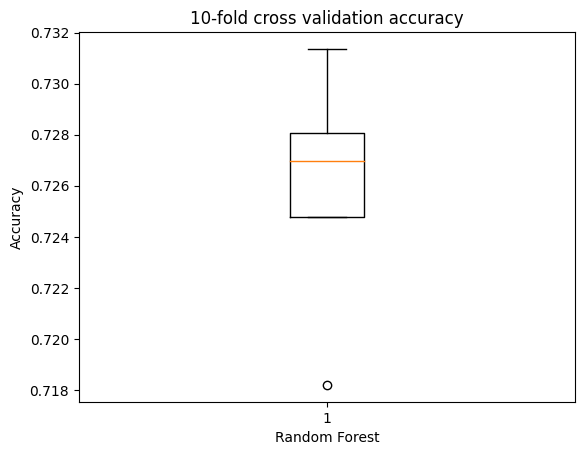

In [ ]:
plt.boxplot(CV_scores_random_forest_model)
plt.title("10-fold cross validation accuracy")
plt.xlabel("Random Forest")
plt.ylabel("Accuracy")

In [ ]:
# Evalution Metrics
TabularData_cv = {'Methods': ['Decision Tree','Random Forest','Logistic Model'],
        'Accuracy': [decision_tree_acc_cv, random_forest_acc_cv, logistic_model_acc_cv ],
        'Precision':[decision_tree_prec_cv, random_forest_prec_cv, logistic_model_prec_cv],
        'Recall':[decision_tree_recall_cv, random_forest_recall_cv, logistic_model_recall_cv],
        'F1-score':[decision_tree_f1_cv, random_forest_f1_cv, logistic_model_f1_cv],
        'AUC score':[decision_tree_roc_cv, random_forest_roc_cv, logistic_model_roc_cv]}

evaluation_metrics_cv =pd.DataFrame(TabularData_cv)

In [ ]:
evaluation_metrics_cv

,Methods,Accuracy,Precision,Recall,F1-score,AUC score
0,Decision Tree,0.637719,0.824701,0.560217,0.667204,0.670383
1,Random Forest,0.485088,0.920319,0.457879,0.611516,0.576268
2,Logistic Model,0.485088,0.920319,0.457879,0.611516,0.576268


In [ ]:
pip install gradio
